## 作業

In [2]:
import pandas
qa = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/tibame_tm/master/data/pchome_qa.xlsx', index_col = 0)

In [3]:
qa.head()

,question,answer
0,請問付款方式有哪幾種？,目前商店街提供信用卡、提款機轉帳、超商付款等多種付款方式。唯實際的付款方式將依各店家開放的付...
1,請問線上分期付款的授權和額度如何計算？,銀行授權是以分期價總額授權，同樣的信用額度也是以分期價總額扣取，但是您付款是分期逐月付款，如...
2,我是選擇分期付款，為什麼銀行簡訊通知總金額？,銀行通知消費總金額是沒錯，因為銀行需要對持卡者做授權額度控管，並且安全完善的通知消費者核對總...
3,請問使用分期付款可以再改回一次付清嗎？,由於一次付清和分期付款兩者是不同的收單銀行，且受限銀行規定，因此無法做直接的更改，故請在訂購...
4,我有網路虛擬信用卡，可不可以在PC home商店街消費？,目前PChome商店街為配合銀行安全性機制和訂單快速作業流程，請消費者在輸入卡號的同時輸入卡...


In [4]:
import jieba
corpus = []
answers = []
for idx, rec in qa.iterrows():
  corpus.append(' '.join(jieba.cut(rec['question'])))
  answers.append(rec['answer'])

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.836 seconds.
DEBUG:jieba:Loading model cost 0.836 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)

In [6]:
#print(vectorizer.get_feature_names())

In [7]:
tfidf

<28x100 sparse matrix of type '<class 'numpy.float64'>'
	with 163 stored elements in Compressed Sparse Row format>

In [8]:
query = '請問要如何查詢我的訂單'
query_seg = ' '.join(jieba.cut(query))

In [9]:
query_vec = vectorizer.transform([query_seg])

In [10]:
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances
cs = cosine_similarity(query_vec, tfidf).flatten()

In [11]:
pos = cs.argsort()[::-1][0]

In [12]:
answers[pos]

'請至[我的帳戶 > 交易紀錄]查詢您在商店街交易的訂單資料。'

In [13]:
corpus[pos]

'如何 查詢 我 的 訂 單資料 呢 ?'

## KMeans 分群

In [14]:
from sklearn.datasets import load_iris
iris = load_iris()

In [15]:
iris.data[0:3,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [16]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 123)
y_kmeans = kmeans.fit_predict(iris.data)

In [18]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

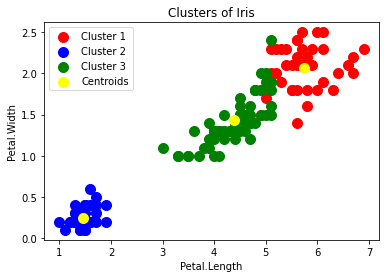

In [19]:
import matplotlib.pyplot as plt
plt.scatter(iris.data[y_kmeans == 0, 2], iris.data[y_kmeans == 0, 3], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(iris.data[y_kmeans == 1, 2], iris.data[y_kmeans == 1, 3], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(iris.data[y_kmeans == 2, 2], iris.data[y_kmeans == 2, 3], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s = 100, c = 'yellow', label = 'Centroids')


plt.title('Clusters of Iris')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.legend()
plt.show()


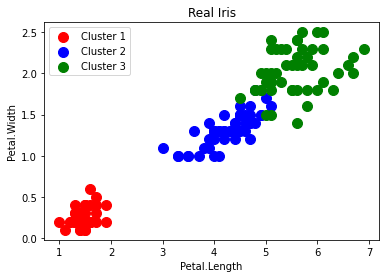

In [20]:
import matplotlib.pyplot as plt
plt.scatter(iris.data[iris.target == 0, 2], iris.data[iris.target  == 0, 3], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(iris.data[iris.target  == 1, 2], iris.data[iris.target  == 1, 3], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(iris.data[iris.target  == 2, 2], iris.data[iris.target  == 2, 3], s = 100, c = 'green', label = 'Cluster 3')

plt.title('Real Iris')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.legend()
plt.show()


In [21]:
import pandas
dataset = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibame_tm/master/data/customers.csv')

In [22]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
X = dataset.iloc[:,[3,4]].values

In [24]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [25]:
# withing cluster sum of squares
kmeans.inertia_

44448.4554479337

In [26]:
from sklearn.metrics import silhouette_score
silhouette_score(X, y_kmeans)

0.553931997444648

In [27]:
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

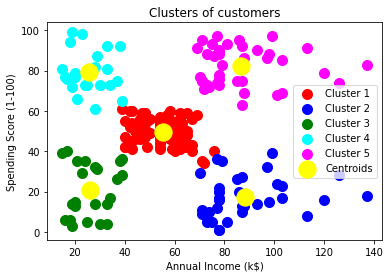

In [28]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [29]:
import numpy
numpy.random.seed(42)
numpy.random.randint(1,42, 6)

array([39, 29, 15,  8, 21, 39])

## 文字分群

In [30]:
import pandas
news = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/tibame_tm/master/data/20150628news.xlsx', index_col = 0 )

In [31]:
news.head()

,category,description,pubdate,title
0,社會/生活,新北市八仙水上樂園昨晚發生粉塵爆炸，新北市衛生局統計到目前為止，由救護車送醫再加上自行送醫的...,"Sun, 28 Jun 2015 07:40:00 +0800",八仙塵爆 五相關人依公共危險重傷害法辦
1,社會/生活,新北市八仙樂園昨天晚上(6/27)舉辦活動，過程中噴灑大量玉米粉而引發粉塵爆炸，根據最新統計...,"Sun, 28 Jun 2015 07:40:00 +0800",八仙樂園意外 病患持續增加中
2,財經/要聞,希臘債務違約限期逼近，資金持續外流。路透社引述三間銀行的消息指出，希臘國內有3分之1的自動櫃...,"Sun, 28 Jun 2015 07:40:00 +0800",希臘國內三分一自動櫃員機現金短缺
3,社會/生活,台鐵「新基隆車站」第一階段工程本月底完成，台鐵表示，明天（29號）啟用後，由於南站周邊道路尚...,"Sun, 28 Jun 2015 07:40:00 +0800",台鐵新基隆車站29日正式啟用
4,財經/要聞,《中國時報》\n●樂園變煉獄 派對驚爆 逾300人遭火紋身\n八仙樂園昨晚舉辦「COLOR ...,"Sun, 28 Jun 2015 07:38:17 +0800",6月28日各報頭版要聞


In [32]:
import jieba
corpus = []
titles = []
for idx, rec in news.iterrows():
  titles.append(rec['title'])
  corpus.append(' '.join(jieba.cut(rec['description'])))

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [34]:
X

<147x12829 sparse matrix of type '<class 'numpy.int64'>'
	with 23783 stored elements in Compressed Sparse Row format>

In [35]:
from sklearn.metrics.pairwise import cosine_similarity
n_cosine_similarities = cosine_similarity(X)

In [36]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=4, init = 'k-means++', random_state = 42)
c = kmeans.fit_predict(n_cosine_similarities)

In [37]:
c

array([0, 0, 3, 1, 0, 1, 0, 1, 1, 1, 1, 0, 3, 2, 2, 1, 0, 1, 1, 1, 2, 0,
       1, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 0, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 1, 3, 1, 1, 0,
       0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 2, 0, 0, 3, 1, 2, 0, 0, 2, 0, 2, 1, 0, 2, 2, 2, 0, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 0, 2, 2], dtype=int32)

In [38]:
np_titles = numpy.array(titles)

In [39]:
for rec in np_titles[c == 3]:
  print(rec)

希臘國內三分一自動櫃員機現金短缺
歐元區財長拒希臘延長救助計劃
呂紹煒專欄：違約與退出 希臘與歐洲才能重生(上)
希臘違約在即  歐盟全力穩定經濟
希臘脫歐變可能 歐洲衝擊大
希債協議  法國願盡最後斡旋努力
希臘1／3提款機錢被提光
確保銀行穩定 希臘續與ECB緊密合作
希臘態度強硬 歐元區耐心漸失
希臘盼展延債務 歐元區拒絕


In [40]:
kmeans.inertia_

140.88904659690155

In [41]:
from sklearn.metrics import silhouette_score

sil_ary = []

for k in range(2,21):
    km = KMeans(n_clusters = k, init='k-means++', random_state=42)
    c = km.fit_predict(n_cosine_similarities)
    sil_ary.append(silhouette_score(n_cosine_similarities, labels=c))


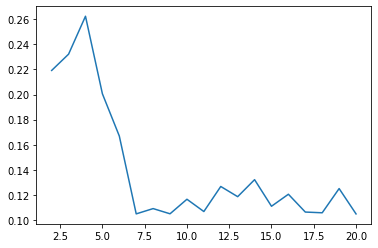

In [42]:
plt.plot(range(2,21), sil_ary)

In [43]:
import pandas
news = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/tibame_tm/master/data/news.xlsx', index_col = 0 )

In [44]:
news.head()

,category,content,link,title
0,政治,新增：立委說法民進黨立法院黨團預計在明天的院會中，讓改制農田水利會的《農田水利會組織通則》修...,https://tw.news.appledaily.com/politics/realti...,【更新】水利會改官派明闖關 綠委24小時前顧議場大門防藍突襲
1,論壇,邱俊棠／台中市民、見習醫師；曾任台灣醫學生聯合會對外副會長對於公民參與公眾事務而能得到單位首...,https://tw.news.appledaily.com/forum/realtime/...,請中市府為所當為 加速中火燃煤限制
2,社會,被控來台涉發展情報組織的中國學生周泓旭，因接觸我方外交部官員而露餡落網，今年9月被台北地院一...,https://tw.news.appledaily.com/local/realtime/...,陸生共諜嗆台司法 「不敢公開審理我」
3,生活,【廣編特輯】 對於全能神教會在中國所遭受的迫害與在韓國、香港及臺灣所面對的反面宣傳，非政府組...,https://tw.news.appledaily.com/life/realtime/2...,【特企】NGO聯名譴責中共迫害宗教信仰
4,生活,立法院交通委員會今審查《道路交通管理處罰條例》，通過營業大客車駕駛人行駛一般道路未繫安全帶，...,https://tw.news.appledaily.com/life/realtime/2...,乘客搭大客車不配合繫安全帶 立院初審通過可罰6千元


In [45]:
import jieba
corpus = []
titles = []
for idx, rec in news.iterrows():
  titles.append(rec['title'])
  corpus.append(' '.join(jieba.cut(rec['content'])))

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [47]:
X

<899x38658 sparse matrix of type '<class 'numpy.int64'>'
	with 128159 stored elements in Compressed Sparse Row format>

In [48]:
from sklearn.metrics.pairwise import cosine_similarity
n_cosine_similarities = cosine_similarity(X)

In [49]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=10, init = 'k-means++', random_state = 42)
c = kmeans.fit_predict(n_cosine_similarities)

In [50]:
np_titles = numpy.array(titles)

In [51]:
#for rec in np_titles[c == 3]:
#  print(rec)

In [52]:
from sklearn.metrics import silhouette_score

sil_ary = []

for k in range(2,21):
    km = KMeans(n_clusters = k, init='k-means++', random_state=42)
    c = km.fit_predict(n_cosine_similarities)
    sil_ary.append(silhouette_score(n_cosine_similarities, labels=c))


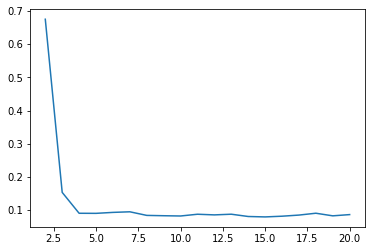

In [53]:
plt.plot(range(2,21), sil_ary)

## Networkx

In [76]:
import networkx as nx
G= nx.Graph()

In [77]:
G.add_node('A')
G.add_node('B')
G.add_node('C')

In [78]:
G.add_edge('A', 'B')
G.add_edge('A', 'C')

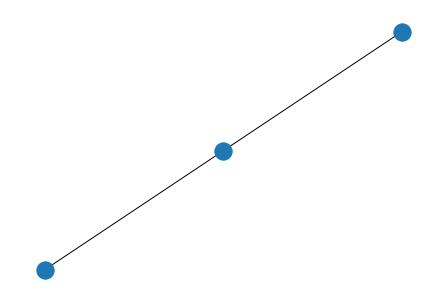

In [79]:
nx.draw(G)

In [80]:
nx.adj_matrix(G).toarray()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: adj_matrix is deprecated and will be removed in version 3.0.
Use `adjacency_matrix` instead

  """Entry point for launching an IPython kernel.


array([[0, 1, 1],
       [1, 0, 0],
       [1, 0, 0]])

## 社群偵測法分群

In [81]:
import pandas
news = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/tibame_tm/master/data/news.xlsx', index_col = 0 )

In [82]:
import jieba
corpus = []
titles = []
for idx, rec in news.iterrows():
  titles.append(rec['title'])
  corpus.append(' '.join(jieba.cut(rec['content'])))

In [83]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [84]:
from sklearn.metrics.pairwise import cosine_similarity
n_cosine_similarities = cosine_similarity(X)

In [85]:
n_cosine_similarities.shape

(899, 899)

In [86]:
m = (n_cosine_similarities >= 0.3).astype(int)

In [87]:
G = nx.from_numpy_matrix(m)

In [66]:
G

In [94]:
from community import community_louvain
comm = community_louvain.best_partition(G)

In [102]:
np_titles = numpy.array(titles)
print(np_titles.shape)

(899,)


In [ ]:
from collections import Counter
cluster_ary = numpy.array(list(comm.values()))
c = Counter(comm.values())
print(c)

for group , cnt in c.most_common(10):
  articles = np_titles[cluster_ary == group]
  for news in articles:
    print(news)
  print('==========================')

###Practice

In [173]:
graph_matrix = (n_cosine_similarities >= 0.3).astype(int)
graph = nx.from_numpy_matrix(graph_matrix)

from community import community_louvain
comm = community_louvain.best_partition(graph)

In [174]:
np_titles = numpy.array(titles)
cluster_ary = numpy.array(list(comm.values()))

from collections import Counter
c = Counter(cluster_ary)

for grp, num in c.most_common(10):
  grp_titles = np_titles[cluster_ary == grp]
  for item in grp_titles:
    print(item)
  print("==========================================================")




小嫻婚變冒毒菇　勾于美人「奉茶」夢魘
遭粉絲頁冒名捲「正嫻」口水戰　于美人：跟我真的無關！
「想抱孫要看天！」　他批小嫻婆婆殘忍強逼
砲轟小嫻被酸民攻陷　「何三姑」粉絲頁關了
【好聚不好散】離婚掏出6千萬　這女星比小嫻還慘
【狗仔偷拍】小嫻搬離何守正家租66坪房　月租6萬元
許聖梅心疼小嫻被當空氣　爆何守正「有兩個女學員」
【動畫解盤】毒菇跳火線譙seafood　小嫻難瘦香菇
十二月十四日各報頭條搶先報
不捨善良小嫻慘遭婚變　乃哥「命運捉弄人」
【獨家】小嫻賣房求子　婆婆竟拒入籍何家
【毒菇護弟】何守正姊姊不是華岡七仙女　美法連線批小嫻
小嫻離婚導火線　拉何守正信妙禪
【狗仔偷拍】何守正現身！「全台最沒尊嚴的婆婆」也出來了
小嫻中分手魔咒！ 同公司4女星全都婚變
何守正姐姐神護航！遭網友酸：全台最討人厭大姑
小嫻別傻傻被欺負！女律師說「姐寶」就要這樣對付
【小嫻婚變】他說很奇怪　「一定是男生劈腿？」
教友小嫻婚姻觸礁　曾之喬談情避不開Seafood
小嫻守正結婚在台沒登記　想離婚只有兩條路
胡瓜2個月前耳聞小嫻婚變　震驚之餘好心疼
何守正兩個姊姊護航扯婆媳　「他」戳破媽寶特色
大姑出面護弟！轟小嫻不能生「媽媽是全台最沒有尊嚴的婆婆」
小嫻信奉妙禪　關鍵原因與何守正有關！
小嫻何守正想離婚　必須先做這件事！
女網紅因為這理由挺余祥銓！讓人不知該哭還是笑
「小嫻不快樂！」　許聖梅：何守正虧欠她
【內幕動畫】小嫻婚變何守正姊反擊　不滿媽煮飯侍奉星媳婦
小嫻多信妙禪？　曾見證「師父帶我跳舞」
【話當年】被拍和她上賓館　何守正掰了阿妹
小嫻婚變無徵兆　男星嘆：兩人向來出雙入對
【獨家內幕】太傷！小嫻被分手　何守正當小三面前攤牌
【小嫻離婚】何守正稱沒有遺憾　人妻女星超火「一嘴屁話」
【小嫻離婚】3大退讓人財兩失　求子花光430萬積蓄
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】N